**AI Image_Classifier**

Cell 1: Imports & Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Configure plotting to look professional
plt.style.use('ggplot')
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


Cell 2: Load and Preprocess Data (MNIST)

In [2]:
# Load the dataset (MNIST is a standard benchmark, 60k training, 10k test)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to include channel dimension (28, 28, 1) - Required for CNNs
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(f"Training Data Shape: {x_train.shape}")
print(f"Test Data Shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28, 1)
Test Data Shape: (10000, 28, 28, 1)


Cell 3: Visualize the Data

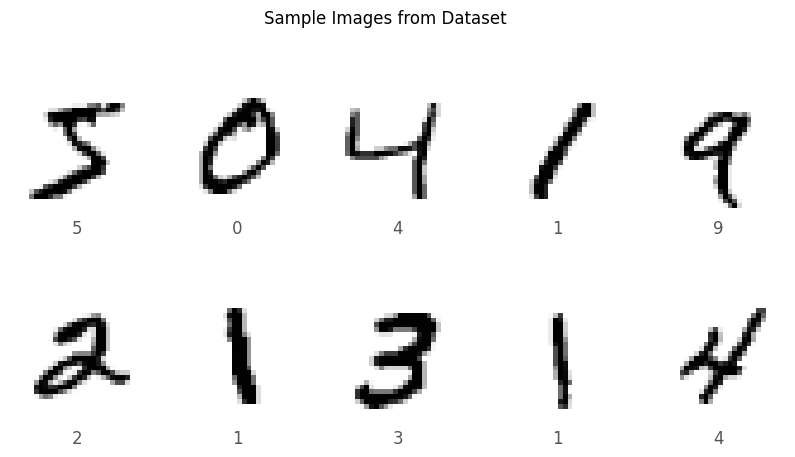

In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Sample Images from Dataset")
plt.show()

Cell 4: Build the CNN Architecture

In [4]:
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Classification Head (Flatten -> Dense)
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3), # Dropout helps prevent overfitting
    layers.Dense(10, activation='softmax') # Softmax for probability distribution
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Cell 5: Compile and Train the Model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train for 5 epochs, using 10% of training data for validation
history = model.fit(x_train, y_train, epochs=5,
                    validation_split=0.1, batch_size=64)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 54s 61ms/step - accuracy: 0.8210 - loss: 0.5533 - val_accuracy: 0.9847 - val_loss: 0.0515
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - accuracy: 0.9753 - loss: 0.0848 - val_accuracy: 0.9900 - val_loss: 0.0364
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 54s 64ms/step - accuracy: 0.9836 - loss: 0.0556 - val_accuracy: 0.9902 - val_loss: 0.0335
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.9876 - loss: 0.0428 - val_accuracy: 0.9880 - val_loss: 0.0444
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9889 - loss: 0.0368 - val_accuracy: 0.9925 - val_loss: 0.0267


Cell 6: Evaluation & Performance Visualization

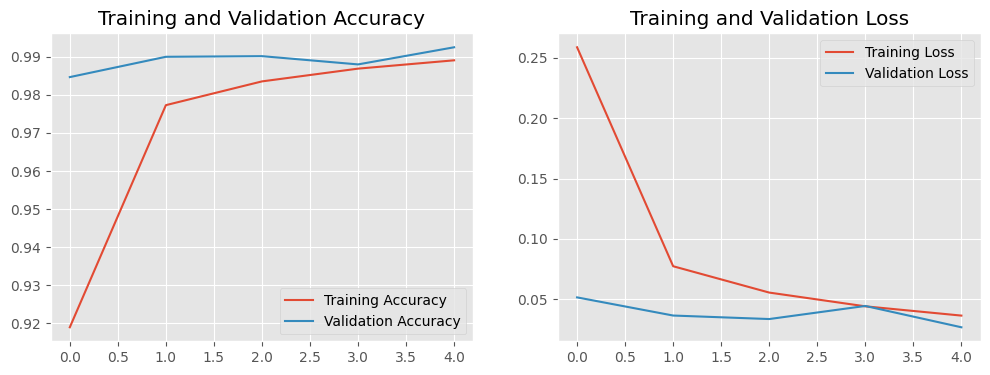

313/313 - 4s - 13ms/step - accuracy: 0.9918 - loss: 0.0263

Final Test Accuracy: 99.18%


In [6]:
# Plot Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Final Evaluation on Test Set
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")

Cell 7: Prediction on New Samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


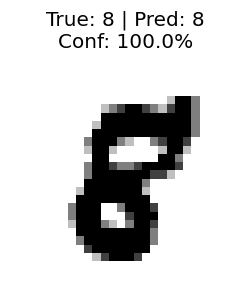

In [7]:
# Grab a random image from the test set
random_idx = np.random.randint(0, len(x_test))
img = x_test[random_idx]
true_label = y_test[random_idx]

# Add batch dimension (1, 28, 28, 1)
img_batch = np.expand_dims(img, axis=0)

# Predict
predictions = model.predict(img_batch)
predicted_label = np.argmax(predictions)
confidence = np.max(predictions) * 100

# Display Result
plt.figure(figsize=(3,3))
plt.imshow(img.squeeze(), cmap=plt.cm.binary)
plt.title(f"True: {true_label} | Pred: {predicted_label}\nConf: {confidence:.1f}%")
plt.axis('off')
plt.show()